In [12]:
import pandas as pd

# 読み込みと日付型変換
df = pd.read_csv("sample_pandas_6.csv")
df['発注日'] = pd.to_datetime(df['発注日'])

# 派生列の追加
df['月'] = df['発注日'].dt.month
df['年'] = df['発注日'].dt.year
df['季節'] = df['月'].map({12:'冬', 1:'冬', 2:'冬',
                          3:'春', 4:'春', 5:'春',
                          6:'夏', 7:'夏', 8:'夏',
                          9:'秋', 10:'秋', 11:'秋'})

# 売上金額の算出
df['売上金額'] = df['単価'] * df['注文数']

In [13]:
seasonal_sales = df.groupby(['商品名', '季節'])['売上金額'].sum().unstack(fill_value=0)

In [14]:
monthly_sales = df.groupby(['年', '月'])['売上金額'].sum().reset_index()
monthly_sales['年月'] = pd.to_datetime(monthly_sales['年'].astype(str) + '-' + monthly_sales['月'].astype(str).str.zfill(2))

In [15]:
pivot_table = df.pivot_table(values='売上金額', index='商品名', columns='月', aggfunc='sum', fill_value=0)

/tmp/ipython-input-16-526320719.py:9: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-16-526320719.py:9: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-16-526320719.py:9: UserWarning: Glyph 22770 (\N{CJK UNIFIED IDEOGRAPH-58F2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-16-526320719.py:9: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-16-526320719.py:9: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-16-526320719.py:9: UserWarning: Glyph 38989 (\N{CJK UNIFIED IDEOGRAPH-984D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-16-526320719.py:9: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}

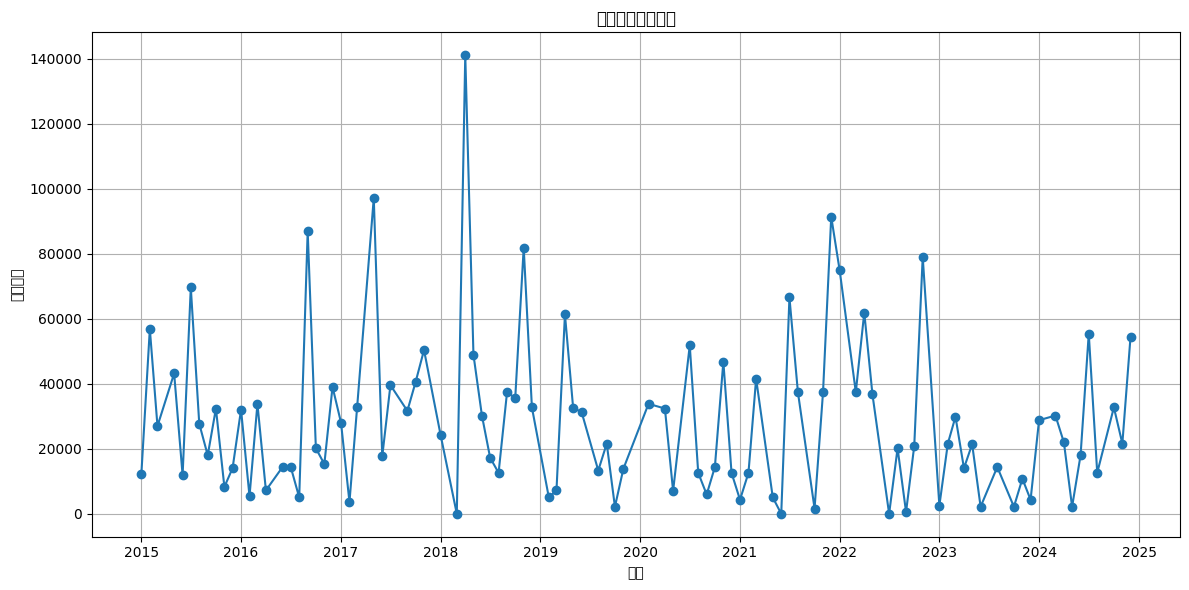

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['年月'], monthly_sales['売上金額'], marker='o')
plt.title('月次売上トレンド')
plt.xlabel('年月')
plt.ylabel('売上金額')
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 20908 (\N{CJK UNIFIED IDEOGRAPH-51AC}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 22799 (\N{CJK UNIFIED IDEOGRAPH-590F}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 26149 (\N{CJK UNIFIED IDEOGRAPH-6625}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 31179 (\N{CJK UNIFIED IDEOGRAPH-79CB}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 21830 (\N{CJK UNIFIED IDEOGRAPH-5546}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from fon

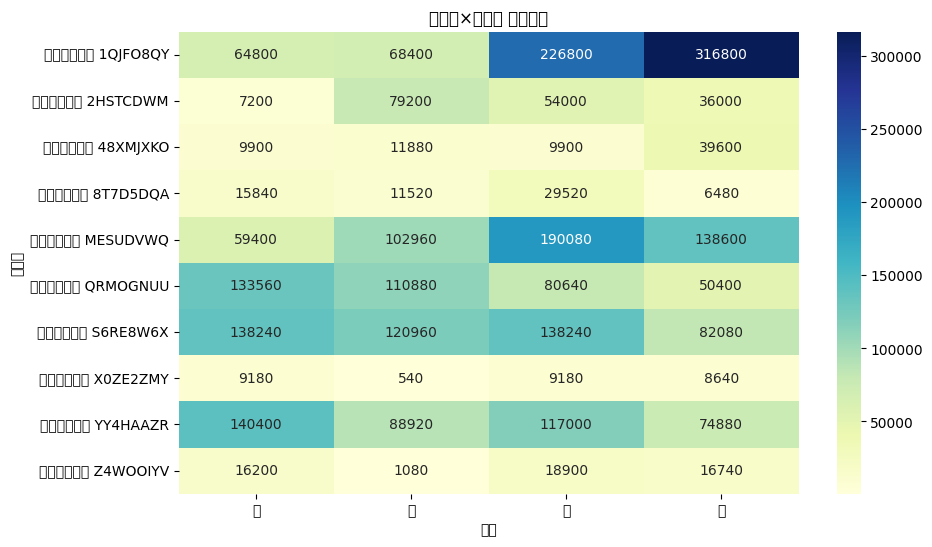

In [17]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(seasonal_sales, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("商品別×季節別 売上金額")
plt.show()

In [18]:
# 売上金額列の作成
df['売上金額'] = df['単価'] * df['注文数']

# IQRを計算
Q1 = df['売上金額'].quantile(0.25)
Q3 = df['売上金額'].quantile(0.75)
IQR = Q3 - Q1

# 外れ値の条件
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 外れ値を除去したデータフレーム
df_clean = df[(df['売上金額'] >= lower_bound) & (df['売上金額'] <= upper_bound)]

In [19]:
from scipy.stats import zscore

# Zスコアを計算
df['z_score'] = zscore(df['売上金額'])

# Zスコアが±3以内のデータを残す
df_clean = df[df['z_score'].abs() < 3]

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22770 (\N{CJK UNIFIED IDEOGRAPH-58F2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38989 (\N{CJK UNIFIED IDEOGRAPH-984D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

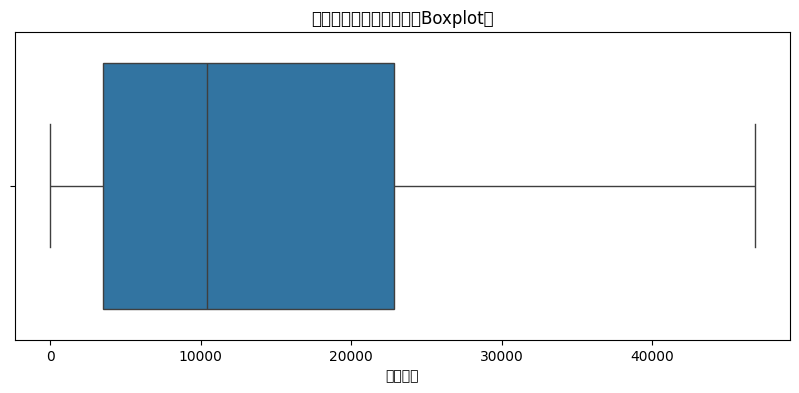

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['売上金額'])
plt.title("売上金額の外れ値検出（Boxplot）")
plt.show()

In [22]:
df['発注日'] = pd.to_datetime(df['発注日'])
df['月'] = df['発注日'].dt.month
df['季節'] = df['月'].map({12:'冬', 1:'冬', 2:'冬',
                          3:'春', 4:'春', 5:'春',
                          6:'夏', 7:'夏', 8:'夏',
                          9:'秋', 10:'秋', 11:'秋'})

In [23]:
df['売上金額'] = df['単価'] * df['注文数']

In [24]:
seasonal_sales = df.groupby('季節')['売上金額'].sum().sort_values(ascending=False)

In [25]:
product_season = df.groupby(['商品名', '季節'])['売上金額'].sum().unstack(fill_value=0)

In [26]:
monthly_sales = df.groupby('月')['売上金額'].sum()
monthly_avg = monthly_sales.mean()
seasonal_index = (monthly_sales / monthly_avg) * 100

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22770 (\N{CJK UNIFIED IDEOGRAPH-58F2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38989 (\N{CJK UNIFIED IDEOGRAPH-984D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  fig.canvas

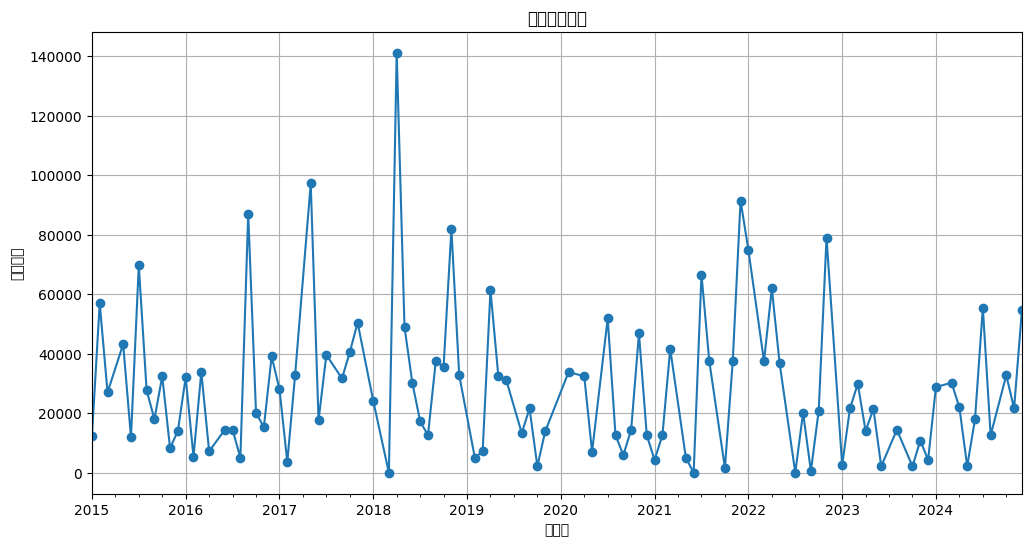

In [27]:
import matplotlib.pyplot as plt

monthly_sales_by_year = df.groupby([df['発注日'].dt.to_period('M')])['売上金額'].sum()
monthly_sales_by_year.plot(figsize=(12,6), marker='o', title='月別売上推移')
plt.ylabel('売上金額')
plt.grid(True)
plt.show()